# XGBoost

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework. Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy.

Sources:
- https://xgboost.readthedocs.io/en/latest/tutorials/model.html
- https://www.datacamp.com/community/tutorials/xgboost-in-python
- https://www.datacamp.com/community/open-courses/basic-statistics
- https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a
- https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn
- https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py

## Gradient Boosting

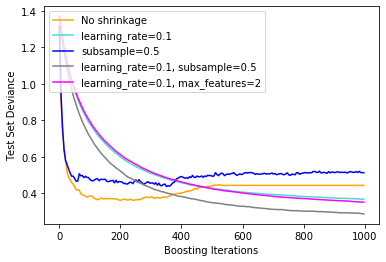

In [1]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py
#
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets


# Generate data for binary classification
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2, 'min_samples_split': 5}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange', {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise', {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue', {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray', {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta', {'learning_rate': 0.1, 'max_features': 2})]:
    
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

## XGBoost demo

In [2]:
# Import the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

In [7]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
# pip3 install xgboost
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [11]:
# parameters: https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
#   learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
#   max_depth: determines how deeply each tree is allowed to grow during any boosting round.
#   subsample: percentage of samples used per tree. Low value can lead to underfitting.
#   colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
#   n_estimators: number of trees you want to build.
#   objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
# regularization parameters to penalize models as they become more complex:
#   gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
#   alpha: L1 regularization on leaf weights. A large value leads to more regularization.
#   lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [12]:
# learn
xg_reg.fit(X_train,y_train)

# make prediction
preds = xg_reg.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


In [14]:
# pip3 install graphviz

# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

## XGBoost Regression

In [15]:
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from scipy.stats import uniform, randint

In [16]:
X,y = load_diabetes(return_X_y=True)
print ('X shape:', X.shape, 'Y shape:', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# reg:squarederror: regression with squared loss
# reg:logistic: logistic regression
# binary:logistic: logistic regression for binary classification, output probability
# ...

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Root mean square error:', np.sqrt(mse))

X shape: (442, 10) Y shape: (442,)
Root mean square error: 58.379260646934036


## XGBoost Binary Classification

In [17]:
X,y = load_breast_cancer(return_X_y=True)
print ('X shape:', X.shape, 'Y shape:', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

X shape: (569, 30) Y shape: (569,)
[[38  3]
 [ 1 72]]


## XGBoost Multiclass Classification

In [18]:
X,y = load_wine(return_X_y=True)
print ('X shape:', X.shape, 'Y shape:', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

X shape: (178, 13) Y shape: (178,)
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 17]]


## XGBoost Cross Validation

In [19]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

X,y = load_diabetes(return_X_y=True)
print ('X shape:', X.shape, 'Y shape:', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

X shape: (442, 10) Y shape: (442,)
Scores: [63.94113147 61.42459229 67.48347369 69.49735072 59.90352078]
Mean: 64.450
Std: 3.599


## XGBoost Hyperparameter Searching

In [20]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}\n".format(results['params'][candidate]))

X,y = load_diabetes(return_X_y=True)

xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

searchCV = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)
searchCV.fit(X, y)
report_best_scores(searchCV.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model with rank: 1
Mean validation score: 0.464 (std: 0.009)
Parameters: {'colsample_bytree': 0.7516959613604889, 'gamma': 0.09614450940433539, 'learning_rate': 0.042260584879943656, 'max_depth': 2, 'n_estimators': 117, 'subsample': 0.7114361356127834}



[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   39.8s finished


## XGBoost Early Stopping

In [21]:
X,y = load_breast_cancer(return_X_y=True)
print ('X shape:', X.shape, 'Y shape:', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# if more than one evaluation metric are given the last one is used for early stopping
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
# learn
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
# predict
y_pred = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred)

X shape: (569, 30) Y shape: (569,)
[0]	validation_0-auc:0.95644
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.97101
[2]	validation_0-auc:0.96479
[3]	validation_0-auc:0.96479
[4]	validation_0-auc:0.96544
[5]	validation_0-auc:0.96479
[6]	validation_0-auc:0.97330
[7]	validation_0-auc:0.98886
[8]	validation_0-auc:0.98985
[9]	validation_0-auc:0.98985
[10]	validation_0-auc:0.99148
[11]	validation_0-auc:0.98985
[12]	validation_0-auc:0.99017
[13]	validation_0-auc:0.98985
[14]	validation_0-auc:0.98985
[15]	validation_0-auc:0.98985
Stopping. Best iteration:
[10]	validation_0-auc:0.99148



0.956140350877193

In [22]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.991484, best iteration: 10, best ntree limit 11


## XGBoost Evaluations

In [23]:
X,y = load_breast_cancer(return_X_y=True)
print ('X shape:', X.shape, 'Y shape:', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])
# learn
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
# predict
y_pred = xgb_model.predict(X_test)

X shape: (569, 30) Y shape: (569,)
[0]	validation_0-auc:0.95644	validation_0-error:0.05263	validation_0-error@0.6:0.06140
[1]	validation_0-auc:0.97101	validation_0-error:0.05263	validation_0-error@0.6:0.05263
[2]	validation_0-auc:0.96479	validation_0-error:0.04386	validation_0-error@0.6:0.06140
[3]	validation_0-auc:0.96479	validation_0-error:0.04386	validation_0-error@0.6:0.06140
[4]	validation_0-auc:0.96544	validation_0-error:0.04386	validation_0-error@0.6:0.05263
[5]	validation_0-auc:0.96479	validation_0-error:0.04386	validation_0-error@0.6:0.04386
[6]	validation_0-auc:0.97330	validation_0-error:0.04386	validation_0-error@0.6:0.04386
[7]	validation_0-auc:0.98886	validation_0-error:0.04386	validation_0-error@0.6:0.04386
[8]	validation_0-auc:0.98985	validation_0-error:0.04386	validation_0-error@0.6:0.05263
[9]	validation_0-auc:0.98985	validation_0-error:0.04386	validation_0-error@0.6:0.04386
[10]	validation_0-auc:0.99148	validation_0-error:0.04386	validation_0-error@0.6:0.04386
[11]	va